In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import tqdm

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def load_evaluate_files(input_path: str):
    """Loads a set of results from disk. 
    
    The input_path is assumed to be a folder with all the csvs.
    """
    output = []
    for result_path_name in tqdm.tqdm(
        glob.glob(f"{input_path}/*evaluate.csv"), desc="Loading files"
    ):
        df = pd.read_csv(result_path_name)
#         file_name = result_path_name.split('\\')[-1]
#         name = file_name.replace(".csv", "")
        output.append(df)
    return pd.concat(output, ignore_index=True, axis = 0)


In [3]:
data_e003 = load_evaluate_files("experiments/e003/results_vis")

Loading files: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 221.39it/s]


In [4]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='model', y='f1', hue='sampling', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig("ml_visualizations/smote_regular_boxplot.png", bbox_inches = "tight", dpi=160, quality=100)
plt.close()

NameError: name 'data' is not defined

<Figure size 576x432 with 0 Axes>

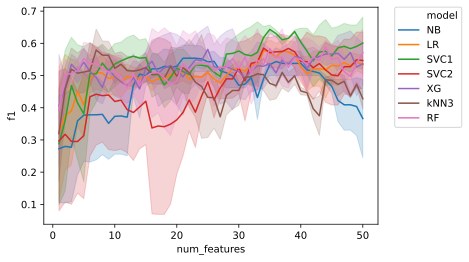

In [8]:
# ax = sns.lineplot(x='num_features', y='f1', hue='model', style='sampling', data=data)
# ax = sns.lineplot(x='num_features', y='f1', hue='model', style='sampling', data=data_audio_open)
ax = sns.lineplot(x='num_features', y='f1', hue='model', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(0, 0.8)

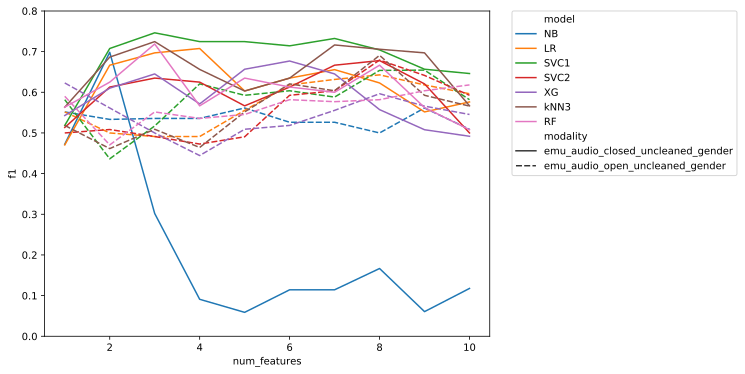

In [27]:
# ax = sns.lineplot(x='num_features', y='f1', hue='model', style='sampling', data=data)
# ax = sns.lineplot(x='num_features', y='f1', hue='model', style='sampling', data=data_audio_open)
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='num_features', y='f1', hue='model', style='modality', data=data_e003)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim(-0, .8)

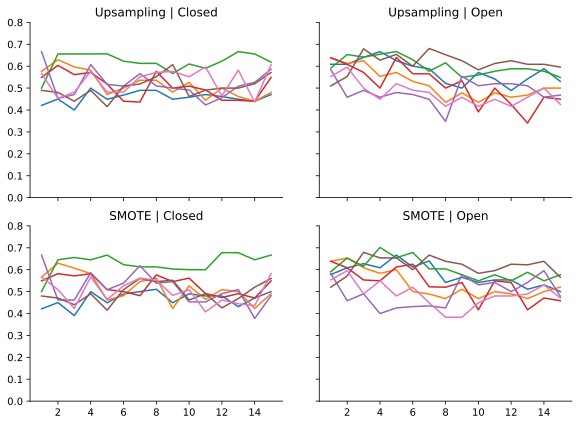

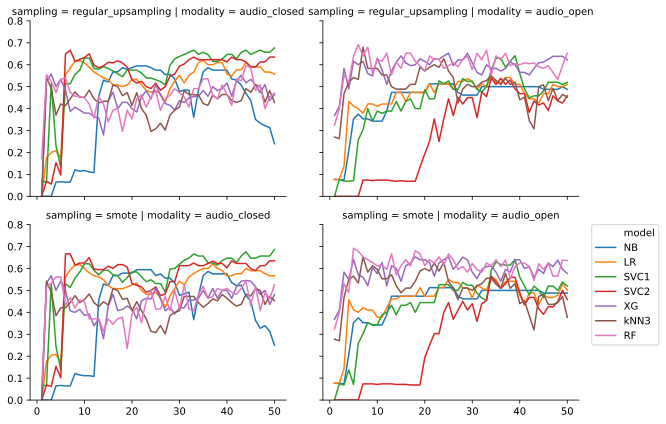

In [81]:
# g1 = sns.FacetGrid(data, col="feature_selection")
g = sns.FacetGrid(data_pca, col="modality", row = "sampling", aspect=1.4)
g2 = sns.FacetGrid(data_chi2, col="modality", row = "sampling", aspect=1.4)
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),]
# g = g.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model', style='model', dashes=dash_styles, data=data_audio_open)
g = g.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model')
g.set(ylim=(-0, .8))
g2 = g2.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model')
g2.set(ylim=(-0, .8))
axes = g.axes.flatten()
axes[0].set_title("Upsampling | Closed")
axes[1].set_title("Upsampling | Open")
axes[2].set_title("SMOTE | Closed")
axes[3].set_title("SMOTE | Open")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#markers={'NB':'.','LR':'0','SVC1':'v','SVC2':'s','XG':'p','kNN3':'d','RF':'|'}

C:\Users\lover\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x432 with 0 Axes>

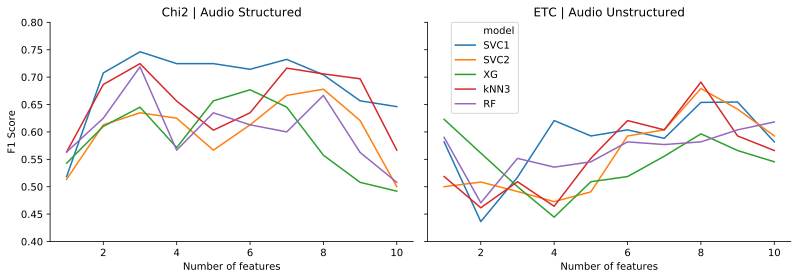

In [53]:
# g1 = sns.FacetGrid(data, col="feature_selection")
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(data_e003, col="modality", aspect=1.4, size=4)
# g2 = sns.FacetGrid(data, col="feature_selection", row = "sampling", aspect=1.4)
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),]
# g = g.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model', style='model', dashes=dash_styles, data=data_audio_open)
g = (g.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model').set_axis_labels("Number of features", "F1 Score"))
# g.set(ylim=(0, 1))
# g2 = g2.map_dataframe(sns.lineplot, x='num_features', y='f1', hue='model')
g.set(ylim=(0.4, .8))
axes = g.axes.flatten()
# axes.set_
# plt.set_xlabel("Number of features")
# fig.ylabel("F1 Score")
axes[0].set_title("Chi2 | Audio Structured")
axes[1].set_title("ETC | Audio Unstructured")
# axes[2].set_title("Chi2 | Audio Open")
# axes[3].set_title("PCA | Audio Open")
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.25, 1), borderaxespad=0)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("ml_visualizations/features_f1_facet_lineplot.png", dpi=160, bbox_inches='tight')
plt.show()
plt.close()
#markers={'NB':'.','LR':'0','SVC1':'v','SVC2':'s','XG':'p','kNN3':'d','RF':'|'}

In [129]:
# ax = sns.scatterplot(x='num_features', y='f1', hue='model', style='sampling', data=data)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

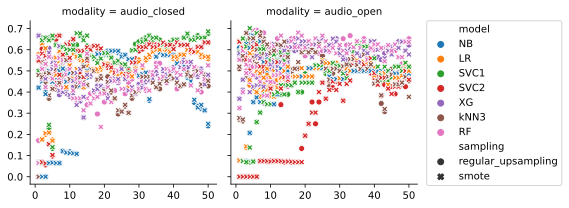

In [70]:
g = sns.FacetGrid(data, col="modality")
g = g.map_dataframe(sns.scatterplot, x='num_features', y='f1', hue='model', style='sampling', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

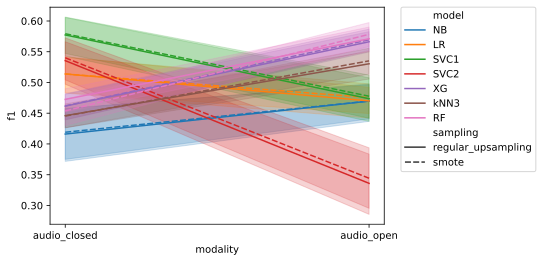

In [71]:
ax = sns.lineplot(x='modality', y='f1', hue='model', style='sampling', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [42]:
data.groupby(['modality', 'sampling', 'model'])['f1'].max().reset_index()


,modality,sampling,model,f1
0,audio_closed,regular_upsampling,LR,0.629630
1,audio_closed,regular_upsampling,NB,0.500000
2,audio_closed,regular_upsampling,RF,0.607143
3,audio_closed,regular_upsampling,SVC1,0.666667
4,audio_closed,regular_upsampling,SVC2,0.603774
5,audio_closed,regular_upsampling,XG,0.666667
6,audio_closed,regular_upsampling,kNN3,0.607143
7,audio_closed,smote,LR,0.629630
8,audio_closed,smote,NB,0.521739
9,audio_closed,smote,RF,0.607143


In [44]:
data.groupby(['modality', 'sampling', 'model'])['f1'].mean().reset_index()


,modality,sampling,model,f1
0,audio_closed,regular_upsampling,LR,0.517377
1,audio_closed,regular_upsampling,NB,0.457781
2,audio_closed,regular_upsampling,RF,0.531789
3,audio_closed,regular_upsampling,SVC1,0.620184
4,audio_closed,regular_upsampling,SVC2,0.509000
5,audio_closed,regular_upsampling,XG,0.519390
6,audio_closed,regular_upsampling,kNN3,0.502980
7,audio_closed,smote,LR,0.522179
8,audio_closed,smote,NB,0.464564
9,audio_closed,smote,RF,0.499250


In [43]:
data.f1.max()

0.7037037037037038